In [1]:
import pandas as pd

# Load the dataset
file_path = r'C:\Users\Fady Kaisar\Desktop\New folder (2)\capstone\Capstone G12\ML\Recipe_and_Properties_of_Leathers\Data - Copy - Copy.xlsx'  # path to your file
data = pd.read_excel(file_path)

# Show the first few rows of the dataset
data.head()

# Show summary statistics and data types
data.describe()
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Soaking_pH                 500 non-null    float64
 1   Temperature (°C)           500 non-null    float64
 2   time                       500 non-null    float64
 3   Sodium_sulfide             500 non-null    float64
 4   Tensile_strength (kg/cm2)  500 non-null    float64
 5   Degree of tannage%         500 non-null    float64
 6   Unnamed: 6                 0 non-null      float64
 7   Unnamed: 7                 0 non-null      float64
 8   temp                       500 non-null    float64
dtypes: float64(9)
memory usage: 35.3 KB


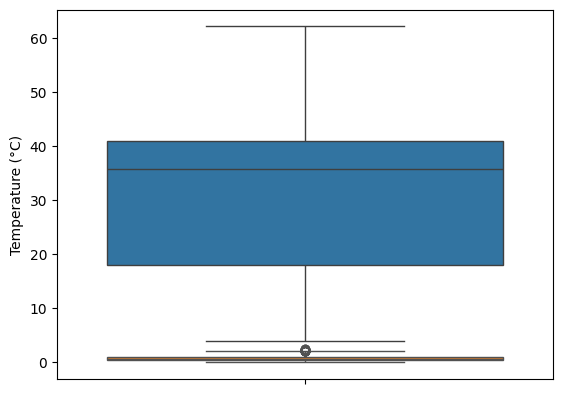

In [2]:
# Handle missing values (example: filling with the mean for numerical columns)
data = data.fillna(data.mean())

# Alternatively, you could remove rows with missing values:
# data = data.dropna()

# Check for outliers in Temperature (°C) and Sodium_sulfide
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot to check for outliers
sns.boxplot(data['Temperature (°C)'])
sns.boxplot(data['Sodium_sulfide'])
plt.show()


In [3]:
from sklearn.preprocessing import PolynomialFeatures

# Let's create polynomial features for Temperature and Soaking_pH
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(data[['Temperature (°C)', 'Soaking_pH']])

# Check the new feature matrix
X_poly[:5]


array([[1.000e+00, 4.600e+01, 7.500e+00, 2.116e+03, 3.450e+02, 5.625e+01],
       [1.000e+00, 3.700e+01, 7.500e+00, 1.369e+03, 2.775e+02, 5.625e+01],
       [1.000e+00, 1.500e+01, 7.500e+00, 2.250e+02, 1.125e+02, 5.625e+01],
       [1.000e+00, 3.400e+01, 7.500e+00, 1.156e+03, 2.550e+02, 5.625e+01],
       [1.000e+00, 3.800e+01, 8.000e+00, 1.444e+03, 3.040e+02, 6.400e+01]])

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target
X = data[['Temperature (°C)', 'Soaking_pH']]
y = data['Sodium_sulfide']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression - MSE: {mse}, R²: {r2}")


Linear Regression - MSE: 0.3811216809106977, R²: 0.004822736969053776


In [5]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_rf = rf_model.predict(X_test)

# Calculate performance metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - MSE: {mse_rf}, R²: {r2_rf}")


Random Forest - MSE: 0.0675572140869158, R²: 0.8235959621809974
